In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
raw_data = pd.read_csv("project1.csv")

/tmp/ipykernel_8413/3149325347.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Part 1

In [2]:
raw_data.shape

(131165, 12)

Using ls -lh project1.csv I got:

-rw-r--r-- 1 root root 16M Sep 22 15:28 project1.csv

**So, the shape of the data is (131165, 12) (12 columns and 131165 rows), and the size of the data is around 16MB.** 

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [4]:
raw_data.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [5]:
raw_data["Outcome Type"].unique()

array(['Transfer', 'Adoption', nan], dtype=object)

In [6]:
raw_data["Outcome Subtype"].unique()

array(['Partner', nan, 'Foster', 'Offsite', 'SCRP', 'Snr', 'Barn',
       'Out State', 'Emer', 'In State'], dtype=object)

In [7]:
type(raw_data["Color"].unique())

numpy.ndarray

**The "DateTime", "MonthYear", and "Age upon Outcome" columns might need to be changed to int or cleaned up.**

**The "Outcome Type", "Animal Type", and "Sex upon Outcome" might need to be changed to categorical data.**

In [8]:
raw_data.duplicated().sum()

17

In [9]:
raw_data.drop_duplicates(inplace=True, ignore_index=True)

**17 duplicate rows were dropped.**

In [10]:
raw_data.isnull().sum()

Animal ID               0
Date of Birth           0
Name                37503
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

**It seems like Name, Outcome Type, and Outcome Subtype are the only ones with null objects.**

**For name, it seems best to just fill in the name with a label of no name, since the animal didn't have a name and it might matter.**

In [11]:
condition0 = raw_data['Name'].isna()
raw_data.loc[condition0, "Name"] = raw_data.loc[condition0, "Name"].fillna("No Name")

**Let's see if there is a Outcome Subtype for the Outcome Type if it's NaN.**

In [12]:
raw_data[raw_data["Outcome Type"].isna()]

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
90635,A812591,6/26/19,Cookie,2021-01-05T17:25:00,Jan-21,NaN,NaN,Dog,Spayed Female,1 year,American Bulldog Mix,White/Black
90637,A827712,2/29/20,No Name,2021-01-05T17:47:00,Jan-21,NaN,NaN,Dog,Spayed Female,10 months,German Shepherd,Tan/Black
90747,A700839,4/20/14,*Turkey,2021-01-12T18:07:00,Jan-21,NaN,NaN,Dog,Neutered Male,6 years,Pit Bull Mix,Blue
90980,A828543,7/20/20,*Blake,2021-01-27T14:24:00,Jan-21,NaN,NaN,Dog,Spayed Female,6 months,Labrador Retriever/Border Collie,Black/White
90984,A828570,9/20/20,*Cupid,2021-01-27T16:59:00,Jan-21,NaN,NaN,Dog,Neutered Male,4 months,American Bulldog Mix,Black/White
91096,A828272,1/12/20,*Dawson,2021-02-02T18:01:00,Feb-21,NaN,NaN,Dog,Neutered Male,1 year,Blue Lacy Mix,Blue/White
91108,A828974,1/30/19,No Name,2021-02-03T15:55:00,Feb-21,NaN,Snr,Cat,Spayed Female,2 years,Domestic Shorthair,Black
91224,A829148,12/3/20,Bingo,2021-02-12T12:25:00,Feb-21,NaN,NaN,Dog,Neutered Male,2 months,Pit Bull,Blue/White
91241,A719747,10/26/15,Layla,2021-02-13T10:58:00,Feb-21,NaN,NaN,Dog,Spayed Female,5 years,American Pit Bull Terrier Mix,White/Brown
91266,A828280,10/20/16,Reggie,2021-02-20T12:20:00,Feb-21,NaN,NaN,Dog,Neutered Male,4 years,Labrador Retriever Mix,Yellow/White


In [13]:
something = raw_data[raw_data["Outcome Type"].isna()]
something.iloc[2].Name

'*Turkey'

**Just saw that there is an asterisk by some of them, which is weird and I'll look at them later.**

In [14]:
raw_data.isnull().sum()

Animal ID               0
Date of Birth           0
Name                    0
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [15]:
condition = raw_data["Outcome Type"] == "Adoption"
condition.sum()

83580

In [16]:
condition2 = (raw_data["Outcome Type"] == "Adoption") & (raw_data["Outcome Subtype"].isna())
condition2.sum()

65308

In [17]:
condition3 = (raw_data["Outcome Type"].isna()) & (raw_data["Outcome Subtype"].isna())
condition3.sum()

38

In [18]:
condition2.sum() + condition3.sum()

65346

**Ok, so all the missing values for Outcome Subtypes are when Outcome Types is adopted or NaN.**

**When the value is missing for both, we just drop because we don't know what it could be, and there's only 38 of them.**

In [19]:
raw_data.drop(raw_data[condition3].index, inplace=True)

In [20]:
raw_data.isnull().sum()

Animal ID               0
Date of Birth           0
Name                    0
DateTime                0
MonthYear               0
Outcome Type            2
Outcome Subtype     65308
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [21]:
raw_data.loc[condition2, "Outcome Subtype"] = raw_data.loc[condition2, "Outcome Subtype"].fillna("Adopted")

In [22]:
raw_data.isnull().sum()

Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        2
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [23]:
raw_data[raw_data["Outcome Type"].isna()]

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
91108,A828974,1/30/19,No Name,2021-02-03T15:55:00,Feb-21,NaN,Snr,Cat,Spayed Female,2 years,Domestic Shorthair,Black
118277,A890645,9/11/23,No Name,2023-12-14T16:22:00,Dec-23,NaN,Foster,Cat,Spayed Female,3 months,Siamese Mix,Lynx Point


**Let's see if the subtype categories are exclusive to either adoption or transfer.**

**So, we still have two. We need to fix the last two missing values.**

In [24]:
condition4 = raw_data["Outcome Type"] == "Adoption"
raw_data[condition4]["Outcome Subtype"].unique()

array(['Adopted', 'Foster', 'Offsite', 'Barn'], dtype=object)

In [25]:
condition5 = raw_data["Outcome Type"] == "Transfer"
raw_data[condition5]["Outcome Subtype"].unique()

array(['Partner', 'SCRP', 'Snr', 'Barn', 'Out State', 'Emer', 'In State'],
      dtype=object)

**So, there's an overlap of 'Barn', but that's it. Foster and Snr are both exclusive to Transfer. So, let's fill it.**

In [26]:
condition6 = raw_data["Outcome Type"].isna()
raw_data.loc[condition6, "Outcome Type"] = raw_data.loc[condition6, "Outcome Type"].fillna("Transfer")

In [27]:
raw_data[raw_data["Outcome Type"].isna()]

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color


In [28]:
raw_data.isnull().sum()

Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [29]:
raw_data.describe()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,131110,131110,131110,131110,131110,131110,131110,131110,131110,131110,131110,131110
unique,121232,7764,25488,108673,140,2,10,4,5,45,2526,599
top,A754989,4/21/14,No Name,2016-04-18T00:00:00-05:00,Jun-19,Adoption,Adopted,Dog,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
freq,8,104,37496,39,1766,83580,65308,68026,49022,22468,30569,14008


In [30]:
data = raw_data #Now we start changing datatypes

In [31]:
times = data["DateTime"].astype(str).str.strip()
has_offset = times.str.contains(r'([+-]\d{2}:\d{2}|Z)$', regex=True, na=False)
timer = pd.to_datetime(times.where(has_offset), errors="coerce", utc=True)
reg = pd.to_datetime(times.where(~has_offset), errors="coerce")
reg = reg.dt.tz_localize("America/Chicago").dt.tz_convert("UTC")
timer = timer.fillna(reg)
data["DateTime"] = timer

/tmp/ipykernel_8413/3074257052.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  has_offset = times.str.contains(r'([+-]\d{2}:\d{2}|Z)$', regex=True, na=False)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131110 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Animal ID         131110 non-null  object             
 1   Date of Birth     131110 non-null  object             
 2   Name              131110 non-null  object             
 3   DateTime          131110 non-null  datetime64[ns, UTC]
 4   MonthYear         131110 non-null  object             
 5   Outcome Type      131110 non-null  object             
 6   Outcome Subtype   131110 non-null  object             
 7   Animal Type       131110 non-null  object             
 8   Sex upon Outcome  131110 non-null  object             
 9   Age upon Outcome  131110 non-null  object             
 10  Breed             131110 non-null  object             
 11  Color             131110 non-null  object             
dtypes: datetime64[ns, UTC](1), object(11)
memory usag

In [33]:
data["DateTime"].unique()

<DatetimeArray>
['2014-06-10 05:00:00+00:00', '2014-07-11 05:00:00+00:00',
 '2014-07-12 05:00:00+00:00', '2014-07-14 05:00:00+00:00',
 '2014-08-20 05:00:00+00:00', '2014-09-16 05:00:00+00:00',
 '2014-09-17 05:00:00+00:00', '2014-12-23 05:00:00+00:00',
 '2014-12-27 05:00:00+00:00', '2014-12-29 05:00:00+00:00',
 ...
 '2025-05-05 05:00:00+00:00', '2025-05-05 12:21:00+00:00',
 '2025-05-05 12:22:00+00:00', '2014-01-10 16:14:00+00:00',
 '2014-01-17 16:14:00+00:00', '2014-01-25 16:14:00+00:00',
 '2014-02-04 16:14:00+00:00', '2014-02-08 16:14:00+00:00',
 '2014-02-07 16:14:00+00:00', '2014-05-14 13:00:00+00:00']
Length: 108662, dtype: datetime64[ns, UTC]

In [34]:
data["Age upon Outcome"].unique()

array(['2 weeks', '2 months', '4 weeks', '5 months', '6 months', '1 year',
       '8 months', '3 weeks', '6 years', '1 weeks', '3 years', '2 years',
       '1 month', '4 months', '10 months', '5 years', '8 years',
       '3 months', '9 years', '7 years', '4 years', '4 days', '1 week',
       '11 months', '7 months', '12 years', '9 months', '10 years',
       '3 days', '2 days', '11 years', '13 years', '1 day', '20 years',
       '25 years', '5 weeks', '17 years', '5 days', '14 years',
       '18 years', '15 years', '16 years', '6 days', '19 years',
       '30 years'], dtype=object)

In [35]:
data['Date of Birth'].unique()

array(['5/25/14', '4/22/14', '6/12/14', ..., '3/9/25', '2/28/25',
       '3/19/25'], dtype=object)

In [36]:
data["Date of Birth"] = pd.to_datetime(data["Date of Birth"], format="%m/%d/%y", utc=True, errors="coerce")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131110 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Animal ID         131110 non-null  object             
 1   Date of Birth     131110 non-null  datetime64[ns, UTC]
 2   Name              131110 non-null  object             
 3   DateTime          131110 non-null  datetime64[ns, UTC]
 4   MonthYear         131110 non-null  object             
 5   Outcome Type      131110 non-null  object             
 6   Outcome Subtype   131110 non-null  object             
 7   Animal Type       131110 non-null  object             
 8   Sex upon Outcome  131110 non-null  object             
 9   Age upon Outcome  131110 non-null  object             
 10  Breed             131110 non-null  object             
 11  Color             131110 non-null  object             
dtypes: datetime64[ns, UTC](2), object(10)
memory usag

**So we take the Age in days**

In [38]:
data["Age upon Outcome"] = (data['DateTime'] - data['Date of Birth']).dt.days

In [39]:
cond = data["Age upon Outcome"] <0 # I guess it's possible that you could be born and adopted on the same day
data[cond]["Age upon Outcome"]

24546      -1
40408     -24
41396     -10
45301    -212
68823    -295
68839    -294
78781      -1
92746     -51
93591    -105
100537   -108
104572     -9
119021     -1
119351    -49
Name: Age upon Outcome, dtype: int64

In [40]:
cond.sum()

13

In [41]:
data[cond]

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
24546,A706929,2015-07-06 00:00:00+00:00,No Name,2015-07-05 19:46:00+00:00,Jul-15,Transfer,Partner,Cat,Unknown,-1,Domestic Shorthair Mix,Tortie
40408,A736114,2016-10-28 00:00:00+00:00,No Name,2016-10-04 20:13:00+00:00,Oct-16,Transfer,Partner,Cat,Intact Male,-24,Domestic Shorthair Mix,Orange Tabby
41396,A737397,2016-11-15 00:00:00+00:00,Jellybean,2016-11-05 23:16:00+00:00,Nov-16,Adoption,Adopted,Cat,Intact Female,-10,Domestic Shorthair Mix,White/Orange
45301,A745085,2017-10-11 00:00:00+00:00,Keira,2017-03-13 23:11:00+00:00,Mar-17,Adoption,Adopted,Dog,Spayed Female,-212,Australian Cattle Dog Mix,White
68823,A788874,2019-12-06 00:00:00+00:00,No Name,2019-02-14 23:13:00+00:00,Feb-19,Adoption,Adopted,Dog,Spayed Female,-295,Labrador Retriever Mix,White/Tricolor
68839,A788866,2019-12-06 00:00:00+00:00,No Name,2019-02-15 18:02:00+00:00,Feb-19,Adoption,Adopted,Dog,Neutered Male,-294,German Shepherd/Catahoula,Black Brindle
78781,A804197,2019-09-12 00:00:00+00:00,No Name,2019-09-11 23:24:00+00:00,Sep-19,Transfer,Partner,Cat,Intact Female,-1,Domestic Shorthair,Black/White
92746,A834123,2021-07-04 00:00:00+00:00,Colt,2021-05-14 18:09:00+00:00,May-21,Transfer,Partner,Dog,Neutered Male,-51,Great Pyrenees,White/Tan
93591,A853991,2021-09-28 00:00:00+00:00,No Name,2021-06-15 21:07:00+00:00,Jun-21,Adoption,Adopted,Cat,Neutered Male,-105,Domestic Shorthair,Brown Tabby/White
100537,A850078,2022-05-07 00:00:00+00:00,Holmes,2022-01-19 22:10:00+00:00,Jan-22,Adoption,Adopted,Dog,Intact Male,-108,Whippet Mix,Brown Brindle


**So it seems like they were adopted before they were born...**

**I think i'll just take them out since there's only 13 and there isn't that much numerical data.**

In [42]:
data.drop(data[cond].index, inplace=True)

In [43]:
data['Age upon Outcome'].unique()

array([  16,   80,   30, ..., 5978, 3620, 6680])

In [44]:
data.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,Jun-14,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
1,A680857,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,Jun-14,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
2,A680858,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,Jun-14,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
3,A680859,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,Jun-14,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
4,A680860,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,Jun-14,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black


In [45]:
data["MonthYear"].unique()

array(['Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Dec-14', 'Jan-15',
       'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15',
       'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16',
       'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16',
       'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17',
       'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17',
       'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18',
       'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19',
       'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Oct-13', 'Nov-13',
       'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14',
       'Oct-14', 'Nov-14', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20',
       'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-

**We encode the months and years as the number of months in the 21st century.**

In [46]:
data["MonthYear"].nunique()

140

In [47]:
data["MonthYear"] = pd.to_datetime(data["MonthYear"], format="%b-%y", errors="coerce")

In [48]:
data["MonthYear"].nunique()

140

In [49]:
data["MonthYear"] = ((data["MonthYear"].dt.year - 2000) * 12) + data["MonthYear"].dt.month
data["MonthYear"].unique()

array([174, 175, 176, 177, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 166, 167, 168, 169, 170, 171, 172,
       173, 178, 179, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 292, 293, 294, 295, 296, 297,
       298, 299, 300, 301, 302, 303, 304, 305, 245, 291], dtype=int32)

In [50]:
data["MonthYear"].nunique()

140

**So, the number of unique entries is the same, so nothing probably went wrong there.**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131097 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Animal ID         131097 non-null  object             
 1   Date of Birth     131097 non-null  datetime64[ns, UTC]
 2   Name              131097 non-null  object             
 3   DateTime          131097 non-null  datetime64[ns, UTC]
 4   MonthYear         131097 non-null  int32              
 5   Outcome Type      131097 non-null  object             
 6   Outcome Subtype   131097 non-null  object             
 7   Animal Type       131097 non-null  object             
 8   Sex upon Outcome  131097 non-null  object             
 9   Age upon Outcome  131097 non-null  int64              
 10  Breed             131097 non-null  object             
 11  Color             131097 non-null  object             
dtypes: datetime64[ns, UTC](2), int32(1), int64(1), ob

In [52]:
count = data["Animal ID"].astype(str).str.startswith("A").sum()
print(count)

131097


**So all the animal ids start with A, so we take A off and turn it into int**

In [53]:
data["Animal ID"] = data["Animal ID"].str.lstrip("A").astype(int)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131097 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Animal ID         131097 non-null  int64              
 1   Date of Birth     131097 non-null  datetime64[ns, UTC]
 2   Name              131097 non-null  object             
 3   DateTime          131097 non-null  datetime64[ns, UTC]
 4   MonthYear         131097 non-null  int32              
 5   Outcome Type      131097 non-null  object             
 6   Outcome Subtype   131097 non-null  object             
 7   Animal Type       131097 non-null  object             
 8   Sex upon Outcome  131097 non-null  object             
 9   Age upon Outcome  131097 non-null  int64              
 10  Breed             131097 non-null  object             
 11  Color             131097 non-null  object             
dtypes: datetime64[ns, UTC](2), int32(1), int64(2), ob

In [55]:
data.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,680855,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
1,680857,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
2,680858,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
3,680859,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
4,680860,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black


In [56]:
print(data["Animal Type"].unique())
print(data["Sex upon Outcome"].unique())
print(data["Breed"].unique())
print(data["Color"].unique())

['Bird' 'Dog' 'Cat' 'Livestock']
['Unknown' 'Spayed Female' 'Intact Male' 'Intact Female' 'Neutered Male']
['Duck' 'Black Mouth Cur Mix' 'Catbird Mix' ...
 'Wirehaired Pointing Griffon' 'Labrador Retriever/Affenpinscher'
 'Pekingese/Lhasa Apso']
['Yellow/Black' 'Brown/Black' 'Brown' 'Black/White' 'Black' 'White'
 'Brown/White' 'Tan' 'Blue Tabby' 'Cream' 'Gold' 'Red' 'Fawn/White'
 'White/Gray' 'Torbie' 'Sable' 'Yellow' 'White/Black' 'White/Chocolate'
 'Cream/Black' 'White/Brown' 'Chocolate/White' 'White/Red Tick'
 'White/Brown Brindle' 'Buff/Gray' 'Black/Tan' 'Blue Merle/Black'
 'Chocolate' 'White/Tan' 'Tan/White' 'Pink' 'Tricolor' 'Red/White'
 'Calico' 'Brown Tabby/White' 'Brown Brindle' 'Blue Tick/Black'
 'Blue/White' 'Black/Brown' 'Green/Blue' 'Brown Tabby' 'Orange Tabby'
 'Tortie' 'Blue Merle' 'Orange/Tan' 'White/White' 'Orange Tabby/White'
 'Cream Tabby' 'Cream Tabby/White' 'Lilac Point' 'Lynx Point' 'Black/Buff'
 'White/Cream Tabby' 'Seal Point' 'Blue Merle/White' 'Brown Brindle/W

In [57]:
print(data["Animal Type"].nunique())
print(data["Sex upon Outcome"].nunique())
print(data["Breed"].nunique())
print(data["Color"].nunique())

4
5
2526
599


In [58]:
no_id = data.drop(columns=["Animal ID"]).copy()
no_id.duplicated().sum()

2047

In [59]:
indexes = no_id[no_id.duplicated()].index

**So, it seems there are duplicates that are identical except for the Animal ID. We can drop them.**

In [60]:
data = data.drop(indexes)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129050 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Animal ID         129050 non-null  int64              
 1   Date of Birth     129050 non-null  datetime64[ns, UTC]
 2   Name              129050 non-null  object             
 3   DateTime          129050 non-null  datetime64[ns, UTC]
 4   MonthYear         129050 non-null  int32              
 5   Outcome Type      129050 non-null  object             
 6   Outcome Subtype   129050 non-null  object             
 7   Animal Type       129050 non-null  object             
 8   Sex upon Outcome  129050 non-null  object             
 9   Age upon Outcome  129050 non-null  int64              
 10  Breed             129050 non-null  object             
 11  Color             129050 non-null  object             
dtypes: datetime64[ns, UTC](2), int32(1), int64(2), ob

In [62]:
data.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,680855,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
8,683090,2014-04-22 00:00:00+00:00,Jenny Tyson,2014-07-11 05:00:00+00:00,175,Adoption,Adopted,Dog,Spayed Female,80,Black Mouth Cur Mix,Brown/Black
9,683591,2014-06-12 00:00:00+00:00,No Name,2014-07-12 05:00:00+00:00,175,Transfer,Partner,Bird,Unknown,30,Catbird Mix,Brown
10,683693,2014-06-29 00:00:00+00:00,No Name,2014-07-14 05:00:00+00:00,175,Transfer,Partner,Bird,Unknown,15,Grackle Mix,Black/White
11,686222,2014-03-13 00:00:00+00:00,No Name,2014-08-20 05:00:00+00:00,176,Transfer,Partner,Bird,Intact Male,160,Silkie Mix,Black


**This is where I start dropping a bunch of stuff because it's not super relevant in my opinion.**

**Ok, so basically drop all of the breed and color because there's too many for one hot encoding (the kernel dies otherwise)**

**I don't think Name is super relevant either, and it's also a lot to do one hot encoding with**

**Also, ID is probably irrelevant if we're being honest. It seems like just a way for the animal to be identified.**

**Also drop date of birth because its a little redundant with age upon outcome**

**Also, DateTime is redundant with the MonthYear, since I don't think the date or time of day affects anything that, that much.**

In [63]:
data1 = data.copy()
data1.drop('Date of Birth', axis=1, inplace=True)
data1.drop('DateTime', axis=1, inplace=True)
data1.drop('Breed', axis=1, inplace=True)
data1.drop('Color', axis=1, inplace=True)
data1.drop('Name', axis=1, inplace=True)
data1.drop('Animal ID', axis=1, inplace=True)

In [64]:
data.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,680855,2014-05-25 00:00:00+00:00,No Name,2014-06-10 05:00:00+00:00,174,Transfer,Partner,Bird,Unknown,16,Duck,Yellow/Black
8,683090,2014-04-22 00:00:00+00:00,Jenny Tyson,2014-07-11 05:00:00+00:00,175,Adoption,Adopted,Dog,Spayed Female,80,Black Mouth Cur Mix,Brown/Black
9,683591,2014-06-12 00:00:00+00:00,No Name,2014-07-12 05:00:00+00:00,175,Transfer,Partner,Bird,Unknown,30,Catbird Mix,Brown
10,683693,2014-06-29 00:00:00+00:00,No Name,2014-07-14 05:00:00+00:00,175,Transfer,Partner,Bird,Unknown,15,Grackle Mix,Black/White
11,686222,2014-03-13 00:00:00+00:00,No Name,2014-08-20 05:00:00+00:00,176,Transfer,Partner,Bird,Intact Male,160,Silkie Mix,Black


In [65]:
data1 = pd.get_dummies(data1, columns=["Animal Type", "Sex upon Outcome", "Outcome Type", "Outcome Subtype"], drop_first=True)
data1.head()

,MonthYear,Age upon Outcome,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Outcome Type_Transfer,Outcome Subtype_Barn,Outcome Subtype_Emer,Outcome Subtype_Foster,Outcome Subtype_In State,Outcome Subtype_Offsite,Outcome Subtype_Out State,Outcome Subtype_Partner,Outcome Subtype_SCRP,Outcome Subtype_Snr
0,174,16,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
8,175,80,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
9,175,30,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
10,175,15,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
11,176,160,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False


**Here, I guess Outcome Type_Transfer being true means that it was transferred. It being 0 means that it was adopted.**

In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129050 entries, 0 to 131147
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   MonthYear                       129050 non-null  int32
 1   Age upon Outcome                129050 non-null  int64
 2   Animal Type_Cat                 129050 non-null  bool 
 3   Animal Type_Dog                 129050 non-null  bool 
 4   Animal Type_Livestock           129050 non-null  bool 
 5   Sex upon Outcome_Intact Male    129050 non-null  bool 
 6   Sex upon Outcome_Neutered Male  129050 non-null  bool 
 7   Sex upon Outcome_Spayed Female  129050 non-null  bool 
 8   Sex upon Outcome_Unknown        129050 non-null  bool 
 9   Outcome Type_Transfer           129050 non-null  bool 
 10  Outcome Subtype_Barn            129050 non-null  bool 
 11  Outcome Subtype_Emer            129050 non-null  bool 
 12  Outcome Subtype_Foster          129050 non-null  

In [67]:
data1.describe()

,MonthYear,Age upon Outcome
count,129050.000000,129050.000000
mean,229.919667,619.437358
std,39.555856,901.820030
min,166.000000,0.000000
25%,196.000000,79.000000
50%,227.000000,277.000000
75%,263.000000,742.000000
max,305.000000,10996.000000


(0.0, 6000.0)

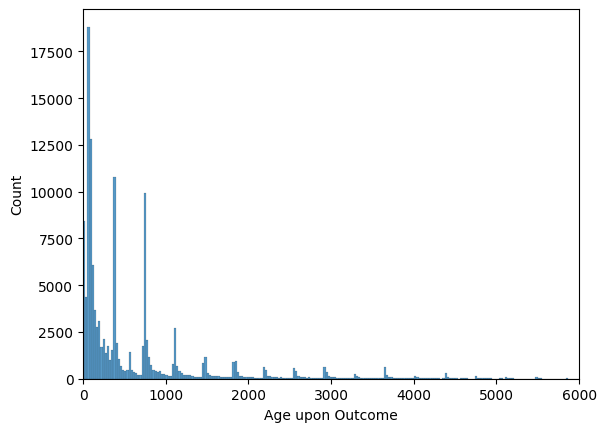

In [68]:
sns.histplot(data=data1['Age upon Outcome'] ) # we can look at maybe like 2000, 4000, and 6000
plt.xlim(0, 6000)

(0.0, 6000.0)

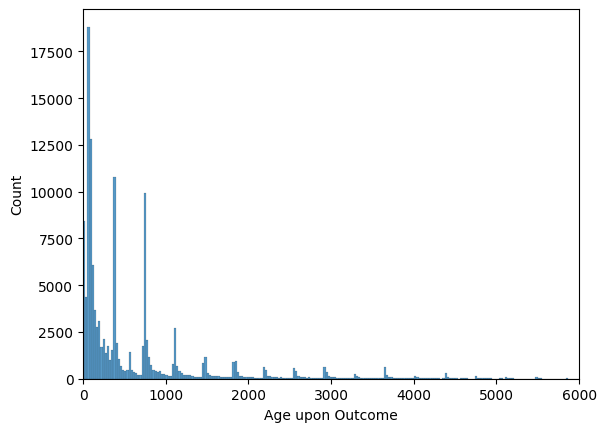

In [69]:
sns.histplot(data=data1['Age upon Outcome'] )
plt.xlim(0, 6000)

(0.0, 4000.0)

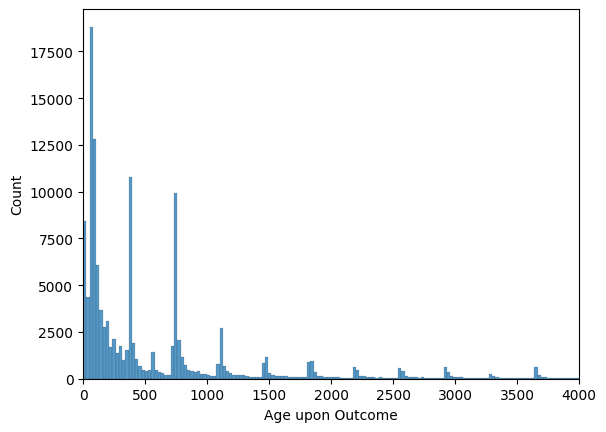

In [70]:
sns.histplot(data=data1['Age upon Outcome'] ) # we can look at maybe like 2000, 4000, and 6000
plt.xlim(0, 4000)

(0.0, 2000.0)

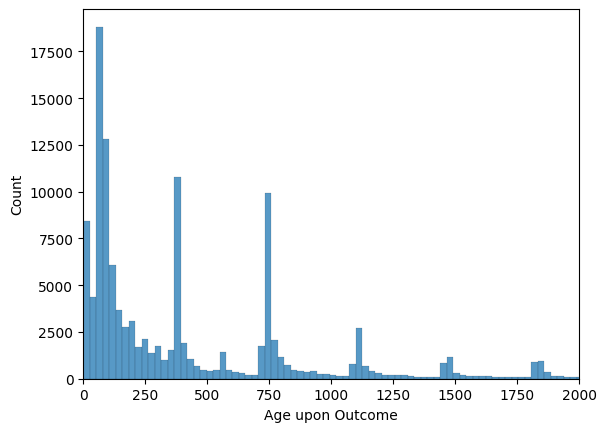

In [71]:
sns.histplot(data=data1['Age upon Outcome'] ) # we can look at maybe like 2000, 4000, and 6000
plt.xlim(0, 2000)

**So... there seems to be massive spikes at certain times. Let's see if this has anything to do with adoption?**

In [72]:
adopted = data1["Outcome Type_Transfer"] == False
adoptees = data1[adopted]
transferred = data1["Outcome Type_Transfer"] == True
transfer = data1[transferred]

In [73]:
adoptees.describe()

,MonthYear,Age upon Outcome
count,83459.000000,83459.000000
mean,233.310620,615.467499
std,39.754198,879.185733
min,166.000000,0.000000
25%,200.000000,86.000000
50%,231.000000,258.000000
75%,268.000000,746.000000
max,305.000000,7308.000000


In [74]:
transfer.describe()

,MonthYear,Age upon Outcome
count,45591.00000,45591.000000
mean,223.71218,626.704591
std,38.42291,941.812712
min,166.00000,0.000000
25%,190.00000,44.000000
50%,221.00000,309.000000
75%,253.00000,738.000000
max,305.00000,10996.000000


**Roughly the same to be honest**

(0.0, 2000.0)

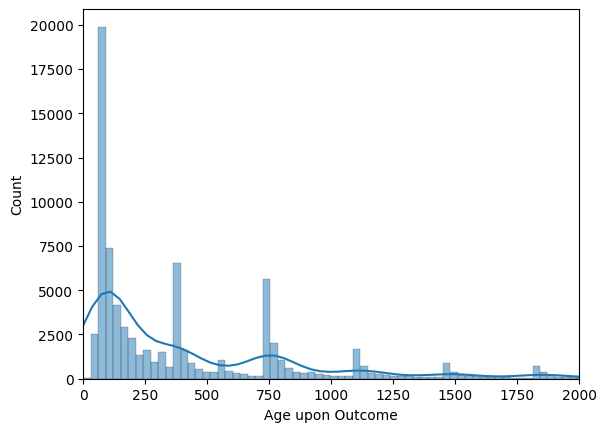

In [75]:
sns.histplot(data=adoptees['Age upon Outcome'] ,kde=True) # we can look at maybe like 2000, 4000, and 6000
plt.xlim(0, 2000)

(0.0, 2000.0)

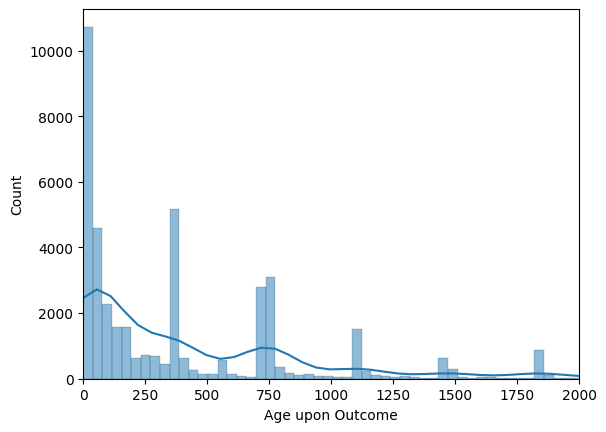

In [76]:
sns.histplot(data=transfer['Age upon Outcome'],kde=True ) # we can look at maybe like 2000, 4000, and 6000
plt.xlim(0, 2000)

**Ok, yeah.. so no There just seems to be a spike around the year marks no matter if they were adopted or transferred**

**So what about the date?**

<Axes: xlabel='MonthYear', ylabel='Count'>

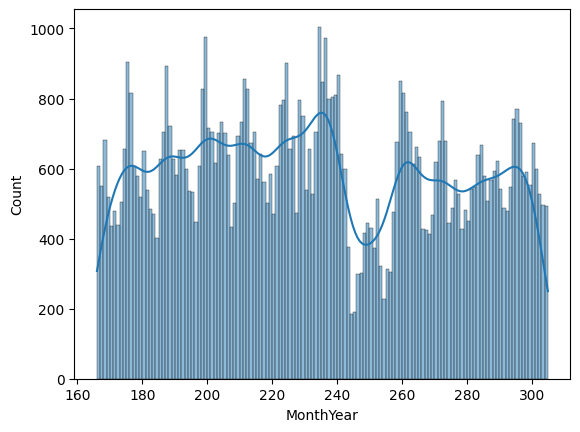

In [77]:
sns.histplot(data=adoptees['MonthYear'], bins=139,kde=True) #max - min = 139

<Axes: xlabel='MonthYear', ylabel='Count'>

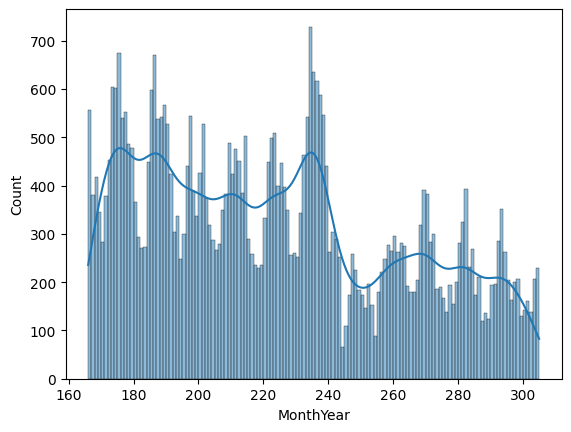

In [78]:
sns.histplot(data=transfer['MonthYear'], bins=139,kde=True) #max - min = 139

**So... they also look very similar. I mean, adoption overall seems to be higher overall as time goes on. More adoption near the end.**

**Maybe if we look at the categorial data?**

In [79]:
ad = data["Outcome Type"] == "Adopted"
a = data[adopted]

<function matplotlib.pyplot.show(close=None, block=None)>

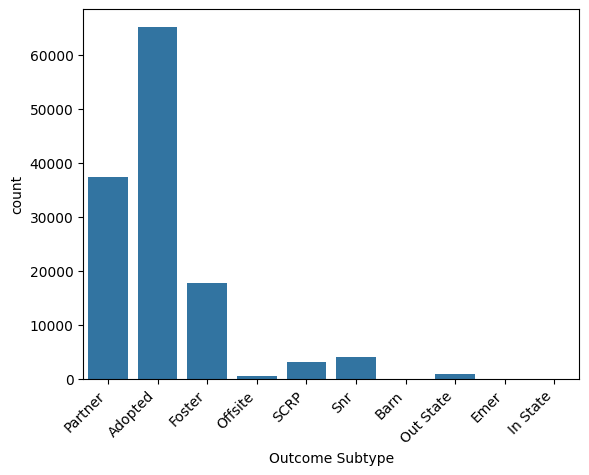

In [80]:
sns.countplot(x=data['Outcome Subtype'])
plt.xticks(rotation=45, ha='right')
plt.show

**Not super helpful**

<Axes: xlabel='Age upon Outcome'>

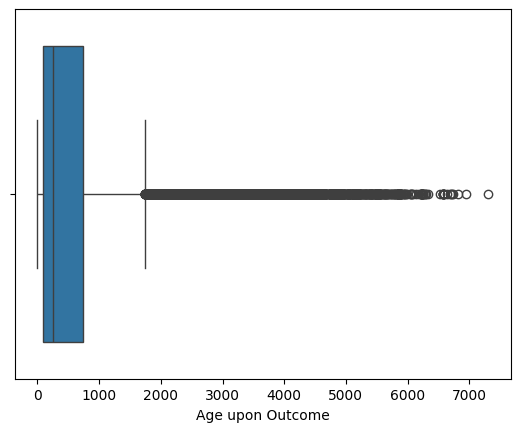

In [81]:
sns.boxplot(data=adoptees, x='Age upon Outcome')

<Axes: xlabel='Age upon Outcome'>

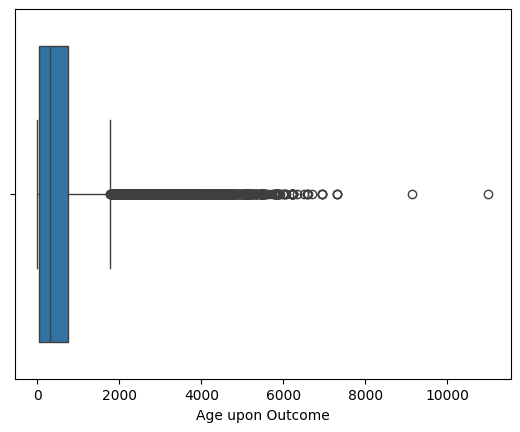

In [82]:
sns.boxplot(data=transfer, x='Age upon Outcome')

**I mean, looks very similar. It seems like the adopted animals are generall older, but not enough to differentiate them.**

<Axes: xlabel='MonthYear'>

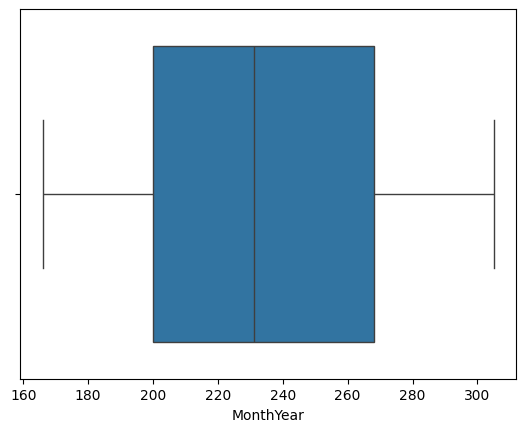

In [83]:
sns.boxplot(data=adoptees, x='MonthYear')

<Axes: xlabel='MonthYear'>

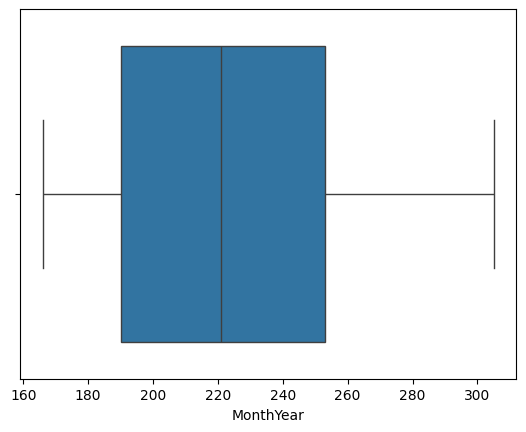

In [84]:
sns.boxplot(data=transfer, x='MonthYear')

**Again, not super noticable to differentiate them**

**Overall, there's some interesting data, but I couldn't really tell if any of it really helped.**

# Now we start the machine learning portion:

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [86]:
s = data["Outcome Subtype"] == "Barn"
s.sum()
data[s]["Outcome Type"].unique

<bound method Series.unique of 14774     Adoption
19172     Transfer
45285     Transfer
70330     Transfer
86163     Transfer
89110     Adoption
89111     Adoption
89175     Transfer
89176     Transfer
89177     Transfer
89179     Transfer
97414     Transfer
122542    Transfer
122543    Transfer
122544    Transfer
122545    Transfer
Name: Outcome Type, dtype: object>

**So aside from the 16 animals where there is barn (and even then only 2 are adoption and the rest are transfer), as I've shown above, there is no overlap in any other of the Outcome Subtypes, so giving the Outcome Subtype will essentially give the Outcome Type. SO, we exclude it.** 

## Splitting the data

In [87]:
data_x = data1.iloc[:, 0:9].copy()
data_y = data1["Outcome Type_Transfer"].copy()
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, stratify=data_y, random_state=26)

In [88]:
## Linear Classifier

In [89]:
clf_linear = SGDClassifier(loss="perceptron", alpha=0.05, random_state=26)
clf_linear.fit(X_train, y_train)

SGDClassifier(alpha=0.05, loss='perceptron', random_state=26)

In [90]:
# Check the accuracy on the test data
accuracy_test=accuracy_score(y_test, clf_linear.predict(X_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, clf_linear.predict(X_train))

print(accuracy_test)
print(accuracy_train)

0.7323776314090146
0.7298167930480988


In [91]:
print(f"Performance on TEST\n*******************\n{classification_report(y_test, clf_linear.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, clf_linear.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.71      0.99      0.83     25038
        True       0.93      0.26      0.41     13677

    accuracy                           0.73     38715
   macro avg       0.82      0.63      0.62     38715
weighted avg       0.79      0.73      0.68     38715

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.71      0.99      0.83     58421
        True       0.92      0.26      0.40     31914

    accuracy                           0.73     90335
   macro avg       0.81      0.62      0.61     90335
weighted avg       0.78      0.73      0.68     90335



In [92]:
clf_linear2 = SGDClassifier(loss="perceptron", alpha=0.01, random_state=26)
clf_linear2.fit(X_train, y_train)
# Check the accuracy on the test data
accuracy_test=accuracy_score(y_test, clf_linear2.predict(X_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, clf_linear2.predict(X_train))

print(accuracy_test)
print(accuracy_train)
print(f"Performance on TEST\n*******************\n{classification_report(y_test, clf_linear2.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, clf_linear2.predict(X_train))}")

0.7879374919281932
0.7894393092378369
Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.79      0.92      0.85     25038
        True       0.78      0.55      0.65     13677

    accuracy                           0.79     38715
   macro avg       0.79      0.73      0.75     38715
weighted avg       0.79      0.79      0.78     38715

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.79      0.92      0.85     58421
        True       0.79      0.55      0.65     31914

    accuracy                           0.79     90335
   macro avg       0.79      0.74      0.75     90335
weighted avg       0.79      0.79      0.78     90335



## Nearest Neighbors

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.82      0.88      0.85     25038
        True       0.74      0.64      0.68     13677

    accuracy                           0.79     38715
   macro avg       0.78      0.76      0.77     38715
weighted avg       0.79      0.79      0.79     38715

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.89      0.94      0.92     58421
        True       0.88      0.78      0.83     31914

    accuracy                           0.89     90335
   macro avg       0.89      0.86      0.87     90335
weighted avg       0.89      0.89      0.88     90335



## Nearest Neighbors Using Grid search CV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 1001, 100)}
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, scoring='f1_macro', cv=5)

In [97]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])},
             scoring='f1_macro')

In [98]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [99]:
knn_search_accuracy3 = KNeighborsClassifier()
param_grid3 = {"n_neighbors": np.arange(1, 101, 10)}
knn_gscv3 = GridSearchCV(knn_search_accuracy, param_grid, scoring='f1_macro', cv=5)

In [100]:
knn_gscv3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])},
             scoring='f1_macro')

In [101]:
knn_gscv3.best_params_

{'n_neighbors': 1}

In [102]:
knn_search_accuracy2 = KNeighborsClassifier()
param_grid2 = {"n_neighbors": np.arange(1, 21)}
knn_gscv2 = GridSearchCV(knn_search_accuracy2, param_grid2, scoring='f1_macro', cv=5)

In [103]:
knn_gscv2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='f1_macro')

In [104]:
knn_gscv2.best_params_

{'n_neighbors': 3}

In [105]:
best_knn = knn_gscv.best_estimator_

In [106]:
print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.83      0.84      0.83     25038
        True       0.70      0.68      0.69     13677

    accuracy                           0.78     38715
   macro avg       0.76      0.76      0.76     38715
weighted avg       0.78      0.78      0.78     38715

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     58421
        True       0.96      0.97      0.97     31914

    accuracy                           0.98     90335
   macro avg       0.97      0.97      0.97     90335
weighted avg       0.98      0.98      0.98     90335

